(494, 1600, 3)
(720, 1280, 3)


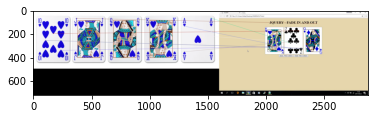

(<matplotlib.image.AxesImage at 0x2161d33b910>, None)

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('images/cards1.jpg')          # queryImage
img2 = cv.imread('images/cards2.jpg') # trainImage
cap=cv.VideoCapture("video/cards1.mp4")

_,frame=cap.read()

# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(frame,None)
print(img1.shape)
print(frame.shape)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
# 
# cv.imshow("mario1",img1)
# cv.imshow("mario2",img2)
img3 = cv.drawMatches(img1,kp1,frame,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

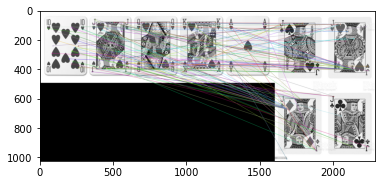

(<matplotlib.image.AxesImage at 0x2161ed54460>, None)

In [13]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('images/cards1.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('images/cards2.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
# print(matches)
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()